In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
from torchvision import datasets
import torchvision.transforms as transforms

from SimCLR.data_aug.fft_filter import BernouilliMaskTransform, FFT_bernouilli

ImportError: cannot import name 'FFT_bernouilli' from 'SimCLR.data_aug.fft_filter' (/home/nathan/PycharmProjects/CPC_graphs/SimCLR/data_aug/fft_filter.py)

In [2]:
class FFT_filter(object):
    # Implements Gaussian blur as described in the SimCLR paper
    def __init__(self, input_shape=96):
        self.N = input_shape
        W = (fft.fftfreq(self.N) ** 2).reshape(1, self.N).repeat(self.N, axis=0)
        self.W = np.sqrt(W + W.T)
        self.max = np.max(self.W)
        return

    def __call__(self, sample):
        sample = np.array(sample)
        f = fft.fft2(sample, axes=[0, 1])
        threshold_inf = np.random.uniform() * self.max
        threshold_sup = np.random.uniform(threshold_inf, self.max)
        f[(threshold_inf < W) & (W < threshold_sup), :] = 0
        sample = fft.ifft2(f, axes=[0, 1])
        return sample
    
# data_transforms = transforms.Compose([transforms.RandomResizedCrop(size=self.input_shape[0]),
#                                       transforms.RandomHorizontalFlip(),
#                                       transforms.RandomApply([color_jitter], p=0.8),
#                                       transforms.RandomGrayscale(p=0.2),
#                                       GaussianBlur(kernel_size=int(0.1 * self.input_shape[0])),
#                                       transforms.ToTensor()])

data_transforms = transforms.Compose([FFT_filter(),
                                      transforms.ToTensor()])

# get a set of data augmentation transformations as described in the SimCLR paper.
color_jitter = transforms.ColorJitter(0.8, 0.8, 0.8, 0.2)
data_transforms2 = transforms.Compose([transforms.RandomResizedCrop(size=96),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomApply([color_jitter], p=0.8),
                                      transforms.RandomGrayscale(p=0.2),
#                                       GaussianBlur(kernel_size=int(0.1 * 96)),
                                      transforms.ToTensor()])

In [3]:
# train_dataset = datasets.STL10('./data', split='train+unlabeled', download=True,
#                                transform=data_transforms)
train_dataset = datasets.STL10('./data', split='train+unlabeled', download=True,
                               transform=None)

Files already downloaded and verified


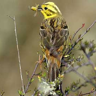

In [4]:
## test
im = np.array(train_dataset[0][0])
train_dataset[0][0]

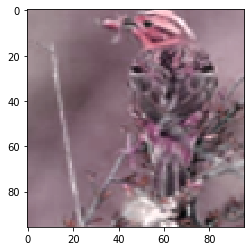

In [40]:
plt.imshow(data_transforms2.__call__(train_dataset[0][0]).permute(1, 2, 0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


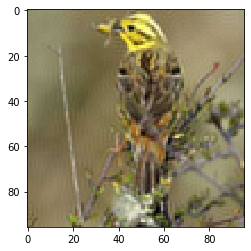

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


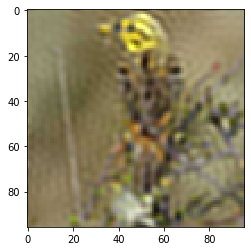

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


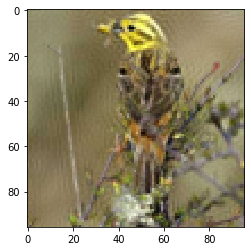

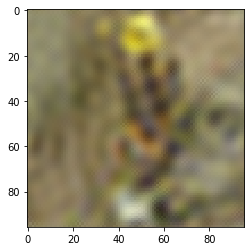

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


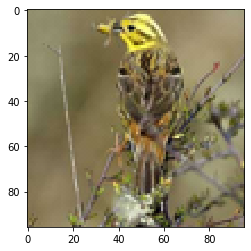

In [224]:
for _ in range(5):
    plt.imshow(np.abs(FFT_filter().__call__(im))/255)
    plt.show()

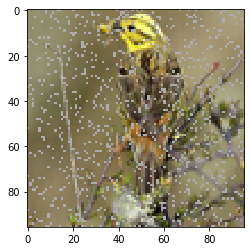

In [6]:
# Bernouilli mask
plt.imshow(BernouilliMaskTransform().__call__(train_dataset[0][0]))

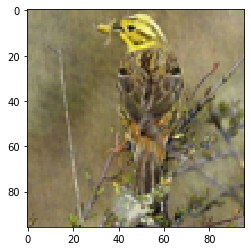

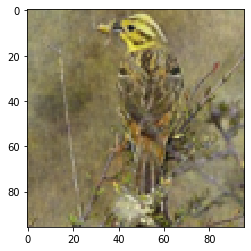

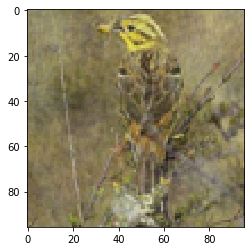

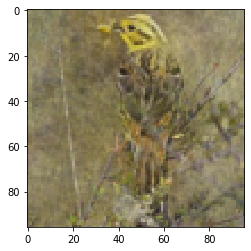

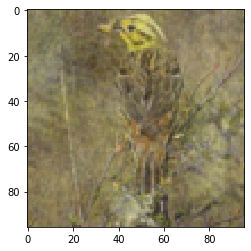

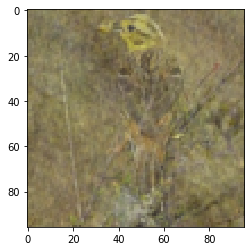

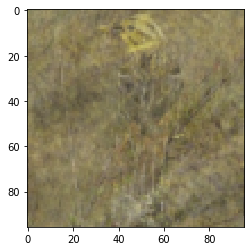

In [6]:
# Fourier Bernouilli mask
plt.imshow(FFT_bernouilli().__call__(train_dataset[0][0])/255)
plt.show()
plt.imshow(FFT_bernouilli(p=0.2).__call__(train_dataset[0][0])/255)
plt.show()
plt.imshow(FFT_bernouilli(p=0.3).__call__(train_dataset[0][0])/255)
plt.show()
plt.imshow(FFT_bernouilli(p=0.4).__call__(train_dataset[0][0])/255)
plt.show()
plt.imshow(FFT_bernouilli(p=0.5).__call__(train_dataset[0][0])/255)
plt.show()
plt.imshow(FFT_bernouilli(p=0.6).__call__(train_dataset[0][0])/255)
plt.show()
plt.imshow(FFT_bernouilli(p=0.7).__call__(train_dataset[0][0])/255)
plt.show()

Quand la fréquence centrale est drop, l'image change par contre radicalement !

# ImdBB dataset 

In [1]:
from torch_geometric.datasets import TUDataset
import networkx as nx
from torch_geometric.utils.convert import to_networkx
from networkx.drawing.nx_pydot import graphviz_layout
from SimCLR.data_aug.graph_transform_bestiary import RemoveEdgeBernouilli
from copy import deepcopy

Imdbdataset = TUDataset("/home/nathan/PycharmProjects/CPC_graphs/data", "IMDB-BINARY", use_node_attr=True,
                       transform=RemoveEdgeBernouilli(0.2))
Imdbdataset2 = TUDataset("/home/nathan/PycharmProjects/CPC_graphs/data", "IMDB-BINARY", use_node_attr=True,
                       transform=RemoveEdgeBernouilli(0.2))
# Imdbdataset, perm = Imdbdataset.shuffle(return_perm=True)
# Imdbdataset2 = Imdbdataset2.index_select(perm)
# Imdbdataset2.transform = RemoveEdgeBernouilli(0.1001)
# Imdbdataset = TUDataset("/home/nathan/PycharmProjects/CPC_graphs/data", "IMDB-BINARY", use_node_attr=True,
#                        transform=None)

OSError: /home/ngrinszt/anaconda3/envs/GRAN/lib/python3.7/site-packages/torch_sparse/_version.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs

In [108]:
Imdbdataset.index_select()

AttributeError: 'TUDataset' object has no attribute 'index_select'

In [106]:
Imdbdataset2[0]

Data(edge_index=[2, 120], y=[1])

In [72]:
num_train = 1000
indices = list(range(num_train))
np.random.shuffle(indices)
indices

[895,
 546,
 193,
 984,
 515,
 203,
 104,
 526,
 819,
 264,
 955,
 766,
 25,
 428,
 863,
 485,
 105,
 884,
 821,
 889,
 902,
 954,
 94,
 987,
 460,
 793,
 172,
 320,
 514,
 532,
 584,
 649,
 518,
 937,
 22,
 953,
 266,
 725,
 505,
 822,
 346,
 273,
 268,
 467,
 594,
 513,
 601,
 243,
 699,
 576,
 347,
 480,
 880,
 33,
 213,
 92,
 831,
 630,
 181,
 103,
 605,
 277,
 403,
 901,
 676,
 550,
 475,
 606,
 455,
 440,
 48,
 747,
 663,
 442,
 522,
 117,
 152,
 271,
 571,
 718,
 903,
 501,
 757,
 112,
 588,
 339,
 597,
 357,
 32,
 790,
 996,
 310,
 973,
 300,
 898,
 969,
 363,
 5,
 63,
 980,
 668,
 263,
 356,
 46,
 406,
 377,
 465,
 489,
 832,
 555,
 14,
 936,
 174,
 50,
 109,
 683,
 678,
 241,
 658,
 195,
 420,
 126,
 925,
 783,
 330,
 885,
 295,
 41,
 826,
 159,
 730,
 527,
 373,
 284,
 830,
 506,
 262,
 173,
 645,
 673,
 208,
 850,
 200,
 599,
 896,
 883,
 521,
 999,
 142,
 814,
 774,
 946,
 679,
 756,
 167,
 149,
 123,
 302,
 510,
 893,
 462,
 56,
 744,
 776,
 982,
 279,
 369,
 437,
 761,
 

In [90]:
Imdbdataset.shuffle(indices)[846]

Data(edge_index=[2, 76], y=[1])

In [94]:
Imdbdataset[0]

Data(edge_index=[2, 82], y=[1])

In [166]:
Imdbdataset2[0]

Data(edge_index=[2, 67], y=[1])

In [149]:
y = []
for data in Imdbdataset:
    y.append(data.y[0])
y

[tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(0),
 ten

/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


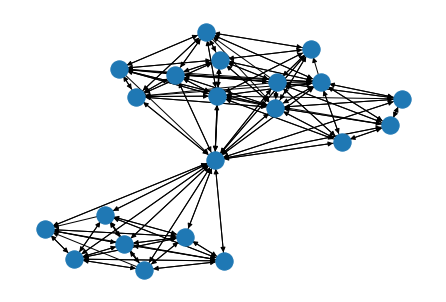

In [150]:
graph = to_networkx(Imdbdataset[900])
nx.draw(graph)

In [19]:
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from torch_geometric.data import DataLoader

num_train = 1000
indices = list(range(num_train))
np.random.shuffle(indices)

split = int(np.floor(0.2 * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Imdbdataset = Imdbdataset.shuffle()
print(Imdbdataset[0])
train_loader1 = DataLoader(Imdbdataset[:750], batch_size=1, num_workers=2, shuffle=False)
train_loader2 = DataLoader(Imdbdataset2[:750], batch_size=1, num_workers=2, shuffle=False)
# train_loader = zip(train_loader1, train_loader2)

Data(edge_index=[2, 83], y=[1])


In [35]:
next(iter(train_loader1))

Batch(batch=[16], edge_index=[2, 84], y=[1])

In [32]:
next(iter(train_loader2))

Batch(batch=[16], edge_index=[2, 84], y=[1])

In [16]:
Imdbdataset2.transform = RemoveEdgeBernouilli(0.1)

In [18]:
for a in train_loader:
    print(a)

(Batch(batch=[16], edge_index=[2, 86], y=[1]), Batch(batch=[16], edge_index=[2, 86], y=[1]))
(Batch(batch=[13], edge_index=[2, 77], y=[1]), Batch(batch=[13], edge_index=[2, 77], y=[1]))
(Batch(batch=[20], edge_index=[2, 338], y=[1]), Batch(batch=[20], edge_index=[2, 338], y=[1]))
(Batch(batch=[20], edge_index=[2, 338], y=[1]), Batch(batch=[20], edge_index=[2, 338], y=[1]))
(Batch(batch=[15], edge_index=[2, 107], y=[1]), Batch(batch=[15], edge_index=[2, 107], y=[1]))
(Batch(batch=[14], edge_index=[2, 114], y=[1]), Batch(batch=[14], edge_index=[2, 114], y=[1]))
(Batch(batch=[12], edge_index=[2, 114], y=[1]), Batch(batch=[12], edge_index=[2, 114], y=[1]))
(Batch(batch=[19], edge_index=[2, 185], y=[1]), Batch(batch=[19], edge_index=[2, 185], y=[1]))
(Batch(batch=[23], edge_index=[2, 110], y=[1]), Batch(batch=[23], edge_index=[2, 110], y=[1]))
(Batch(batch=[14], edge_index=[2, 92], y=[1]), Batch(batch=[14], edge_index=[2, 92], y=[1]))
(Batch(batch=[17], edge_index=[2, 97], y=[1]), Batch(bat

(Batch(batch=[15], edge_index=[2, 194], y=[1]), Batch(batch=[15], edge_index=[2, 194], y=[1]))
(Batch(batch=[14], edge_index=[2, 79], y=[1]), Batch(batch=[14], edge_index=[2, 79], y=[1]))
(Batch(batch=[13], edge_index=[2, 55], y=[1]), Batch(batch=[13], edge_index=[2, 55], y=[1]))
(Batch(batch=[15], edge_index=[2, 116], y=[1]), Batch(batch=[15], edge_index=[2, 116], y=[1]))
(Batch(batch=[14], edge_index=[2, 64], y=[1]), Batch(batch=[14], edge_index=[2, 64], y=[1]))
(Batch(batch=[13], edge_index=[2, 97], y=[1]), Batch(batch=[13], edge_index=[2, 97], y=[1]))
(Batch(batch=[14], edge_index=[2, 95], y=[1]), Batch(batch=[14], edge_index=[2, 95], y=[1]))
(Batch(batch=[17], edge_index=[2, 87], y=[1]), Batch(batch=[17], edge_index=[2, 87], y=[1]))
(Batch(batch=[14], edge_index=[2, 63], y=[1]), Batch(batch=[14], edge_index=[2, 63], y=[1]))
(Batch(batch=[12], edge_index=[2, 66], y=[1]), Batch(batch=[12], edge_index=[2, 66], y=[1]))
(Batch(batch=[15], edge_index=[2, 115], y=[1]), Batch(batch=[15], 

(Batch(batch=[15], edge_index=[2, 194], y=[1]), Batch(batch=[15], edge_index=[2, 194], y=[1]))
(Batch(batch=[13], edge_index=[2, 141], y=[1]), Batch(batch=[13], edge_index=[2, 141], y=[1]))
(Batch(batch=[20], edge_index=[2, 99], y=[1]), Batch(batch=[20], edge_index=[2, 99], y=[1]))
(Batch(batch=[15], edge_index=[2, 89], y=[1]), Batch(batch=[15], edge_index=[2, 89], y=[1]))
(Batch(batch=[30], edge_index=[2, 773], y=[1]), Batch(batch=[30], edge_index=[2, 773], y=[1]))
(Batch(batch=[14], edge_index=[2, 101], y=[1]), Batch(batch=[14], edge_index=[2, 101], y=[1]))
(Batch(batch=[27], edge_index=[2, 164], y=[1]), Batch(batch=[27], edge_index=[2, 164], y=[1]))
(Batch(batch=[38], edge_index=[2, 216], y=[1]), Batch(batch=[38], edge_index=[2, 216], y=[1]))
(Batch(batch=[12], edge_index=[2, 120], y=[1]), Batch(batch=[12], edge_index=[2, 120], y=[1]))
(Batch(batch=[12], edge_index=[2, 117], y=[1]), Batch(batch=[12], edge_index=[2, 117], y=[1]))
(Batch(batch=[26], edge_index=[2, 167], y=[1]), Batch(

(Batch(batch=[13], edge_index=[2, 79], y=[1]), Batch(batch=[13], edge_index=[2, 79], y=[1]))
(Batch(batch=[14], edge_index=[2, 60], y=[1]), Batch(batch=[14], edge_index=[2, 60], y=[1]))
(Batch(batch=[27], edge_index=[2, 157], y=[1]), Batch(batch=[27], edge_index=[2, 157], y=[1]))
(Batch(batch=[13], edge_index=[2, 76], y=[1]), Batch(batch=[13], edge_index=[2, 76], y=[1]))
(Batch(batch=[17], edge_index=[2, 74], y=[1]), Batch(batch=[17], edge_index=[2, 74], y=[1]))
(Batch(batch=[14], edge_index=[2, 96], y=[1]), Batch(batch=[14], edge_index=[2, 96], y=[1]))
(Batch(batch=[12], edge_index=[2, 118], y=[1]), Batch(batch=[12], edge_index=[2, 118], y=[1]))
(Batch(batch=[18], edge_index=[2, 90], y=[1]), Batch(batch=[18], edge_index=[2, 90], y=[1]))
(Batch(batch=[38], edge_index=[2, 692], y=[1]), Batch(batch=[38], edge_index=[2, 692], y=[1]))
(Batch(batch=[16], edge_index=[2, 68], y=[1]), Batch(batch=[16], edge_index=[2, 68], y=[1]))
(Batch(batch=[18], edge_index=[2, 160], y=[1]), Batch(batch=[18]

(Batch(batch=[12], edge_index=[2, 64], y=[1]), Batch(batch=[12], edge_index=[2, 64], y=[1]))
(Batch(batch=[16], edge_index=[2, 115], y=[1]), Batch(batch=[16], edge_index=[2, 115], y=[1]))
(Batch(batch=[14], edge_index=[2, 102], y=[1]), Batch(batch=[14], edge_index=[2, 102], y=[1]))
(Batch(batch=[14], edge_index=[2, 65], y=[1]), Batch(batch=[14], edge_index=[2, 65], y=[1]))
(Batch(batch=[15], edge_index=[2, 81], y=[1]), Batch(batch=[15], edge_index=[2, 81], y=[1]))
(Batch(batch=[12], edge_index=[2, 70], y=[1]), Batch(batch=[12], edge_index=[2, 70], y=[1]))
(Batch(batch=[16], edge_index=[2, 124], y=[1]), Batch(batch=[16], edge_index=[2, 124], y=[1]))
(Batch(batch=[30], edge_index=[2, 790], y=[1]), Batch(batch=[30], edge_index=[2, 790], y=[1]))
(Batch(batch=[13], edge_index=[2, 117], y=[1]), Batch(batch=[13], edge_index=[2, 117], y=[1]))
(Batch(batch=[14], edge_index=[2, 89], y=[1]), Batch(batch=[14], edge_index=[2, 89], y=[1]))
(Batch(batch=[12], edge_index=[2, 67], y=[1]), Batch(batch=[

(Batch(batch=[12], edge_index=[2, 83], y=[1]), Batch(batch=[12], edge_index=[2, 83], y=[1]))
(Batch(batch=[13], edge_index=[2, 53], y=[1]), Batch(batch=[13], edge_index=[2, 53], y=[1]))
(Batch(batch=[27], edge_index=[2, 624], y=[1]), Batch(batch=[27], edge_index=[2, 624], y=[1]))
(Batch(batch=[14], edge_index=[2, 64], y=[1]), Batch(batch=[14], edge_index=[2, 64], y=[1]))
(Batch(batch=[14], edge_index=[2, 73], y=[1]), Batch(batch=[14], edge_index=[2, 73], y=[1]))
(Batch(batch=[18], edge_index=[2, 282], y=[1]), Batch(batch=[18], edge_index=[2, 282], y=[1]))
(Batch(batch=[20], edge_index=[2, 339], y=[1]), Batch(batch=[20], edge_index=[2, 339], y=[1]))
(Batch(batch=[17], edge_index=[2, 252], y=[1]), Batch(batch=[17], edge_index=[2, 252], y=[1]))
(Batch(batch=[25], edge_index=[2, 154], y=[1]), Batch(batch=[25], edge_index=[2, 154], y=[1]))
(Batch(batch=[13], edge_index=[2, 79], y=[1]), Batch(batch=[13], edge_index=[2, 79], y=[1]))
(Batch(batch=[12], edge_index=[2, 73], y=[1]), Batch(batch=[

(Batch(batch=[12], edge_index=[2, 62], y=[1]), Batch(batch=[12], edge_index=[2, 62], y=[1]))
(Batch(batch=[12], edge_index=[2, 118], y=[1]), Batch(batch=[12], edge_index=[2, 118], y=[1]))
(Batch(batch=[15], edge_index=[2, 90], y=[1]), Batch(batch=[15], edge_index=[2, 90], y=[1]))
(Batch(batch=[14], edge_index=[2, 68], y=[1]), Batch(batch=[14], edge_index=[2, 68], y=[1]))
(Batch(batch=[22], edge_index=[2, 233], y=[1]), Batch(batch=[22], edge_index=[2, 233], y=[1]))
(Batch(batch=[20], edge_index=[2, 343], y=[1]), Batch(batch=[20], edge_index=[2, 343], y=[1]))
(Batch(batch=[17], edge_index=[2, 70], y=[1]), Batch(batch=[17], edge_index=[2, 70], y=[1]))
(Batch(batch=[12], edge_index=[2, 124], y=[1]), Batch(batch=[12], edge_index=[2, 124], y=[1]))
(Batch(batch=[12], edge_index=[2, 119], y=[1]), Batch(batch=[12], edge_index=[2, 119], y=[1]))
(Batch(batch=[17], edge_index=[2, 93], y=[1]), Batch(batch=[17], edge_index=[2, 93], y=[1]))
(Batch(batch=[18], edge_index=[2, 83], y=[1]), Batch(batch=[

(Batch(batch=[13], edge_index=[2, 55], y=[1]), Batch(batch=[13], edge_index=[2, 55], y=[1]))
(Batch(batch=[36], edge_index=[2, 181], y=[1]), Batch(batch=[36], edge_index=[2, 181], y=[1]))
(Batch(batch=[12], edge_index=[2, 63], y=[1]), Batch(batch=[12], edge_index=[2, 63], y=[1]))
(Batch(batch=[20], edge_index=[2, 206], y=[1]), Batch(batch=[20], edge_index=[2, 206], y=[1]))
(Batch(batch=[12], edge_index=[2, 121], y=[1]), Batch(batch=[12], edge_index=[2, 121], y=[1]))
(Batch(batch=[12], edge_index=[2, 79], y=[1]), Batch(batch=[12], edge_index=[2, 79], y=[1]))
(Batch(batch=[18], edge_index=[2, 82], y=[1]), Batch(batch=[18], edge_index=[2, 82], y=[1]))
(Batch(batch=[13], edge_index=[2, 71], y=[1]), Batch(batch=[13], edge_index=[2, 71], y=[1]))
(Batch(batch=[17], edge_index=[2, 199], y=[1]), Batch(batch=[17], edge_index=[2, 199], y=[1]))
(Batch(batch=[24], edge_index=[2, 141], y=[1]), Batch(batch=[24], edge_index=[2, 141], y=[1]))
(Batch(batch=[15], edge_index=[2, 87], y=[1]), Batch(batch=[

(Batch(batch=[14], edge_index=[2, 65], y=[1]), Batch(batch=[14], edge_index=[2, 65], y=[1]))
(Batch(batch=[30], edge_index=[2, 781], y=[1]), Batch(batch=[30], edge_index=[2, 781], y=[1]))


In [7]:
from itertools import cycle

# for data1, data2 in zip(iter(train_loader1), iter(train_loader2)):
#     print(data)
for data in train_loader:
    print(data)

In [139]:
a = next(zip(train_loader1, train_loader2))

In [142]:
a[0].edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,
          9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
         13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17,
         18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22,
         22, 22, 22],
        [ 4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
          0,  4, 12, 16, 20,  0,  3, 18,  0,  2, 18,  0,  1, 12, 16, 20,  0,  6,
         10, 14,  0,  5,  8, 10, 14, 15, 19, 21, 22,  5,  6, 10, 14,  0, 11, 13,
         17,  0,  5,  6,  8, 14,  0,  9, 13, 17,  0,  1,  4, 16, 20,  0,  9, 11,
         17,  0,  5,  6,  8, 10,  7, 19, 21, 22,  0,  1,  4, 12, 20,  0, 11, 13,
          0,  2,  3,  0,  7, 15, 21, 22,  0,  4, 16,  0,  7, 15, 19, 22,  0,  7,
      

In [143]:
a[1].edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,
          9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
         13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17,
         18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22,
         22, 22, 22],
        [ 4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
          0,  4, 12, 16, 20,  0,  3, 18,  0,  2, 18,  0,  1, 12, 16, 20,  0,  6,
         10, 14,  0,  5,  8, 10, 14, 15, 19, 21, 22,  5,  6, 10, 14,  0, 11, 13,
         17,  0,  5,  6,  8, 14,  0,  9, 13, 17,  0,  1,  4, 16, 20,  0,  9, 11,
         17,  0,  5,  6,  8, 10,  7, 19, 21, 22,  0,  1,  4, 12, 20,  0, 11, 13,
          0,  2,  3,  0,  7, 15, 21, 22,  0,  4, 16,  0,  7, 15, 19, 22,  0,  7,
      

In [ ]:
1+1